# Import libraries

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style('darkgrid')

import os
from pathlib import Path

# Load datasets

In [20]:
root_path = './data'

all_seeds = list(range(1, 15))
all_seeds = list(map(str, all_seeds))
print(all_seeds)

pathes = {}

for path in Path(root_path).iterdir():
    seed = str(path).split('seed_')[-1]
    if seed in all_seeds:
        pathes[seed] = path
pathes

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']


{'8': PosixPath('data/2024-03-26_221635_seed_8'),
 '12': PosixPath('data/2024-03-26_221635_seed_12'),
 '7': PosixPath('data/2024-03-26_103819_seed_7'),
 '2': PosixPath('data/2024-03-26_103818_seed_2'),
 '9': PosixPath('data/2024-03-26_221635_seed_9'),
 '3': PosixPath('data/2024-03-26_103818_seed_3'),
 '6': PosixPath('data/2024-03-26_103819_seed_6'),
 '14': PosixPath('data/2024-03-26_221635_seed_14'),
 '13': PosixPath('data/2024-03-26_221635_seed_13'),
 '4': PosixPath('data/2024-03-26_103819_seed_4'),
 '11': PosixPath('data/2024-03-26_221635_seed_11'),
 '1': PosixPath('data/2024-03-26_103818_seed_1'),
 '10': PosixPath('data/2024-03-26_221635_seed_10'),
 '5': PosixPath('data/2024-03-26_103819_seed_5')}

In [31]:
learning_curves = []

for seed in pathes:
    seed_df = pd.read_csv(
        pathes[seed] / "learning curve.csv", 
        index_col=0,
    )
    seed_df.rename({'0': seed}, axis=1, inplace=True)
    learning_curves.append(seed_df)
    
learning_curves = pd.concat(learning_curves, axis=1)
learning_curves.describe()

,8,12,7,2,9,3,6,14,13,4,11,1,10,5
count,122.000000,117.000000,300.000000,300.000000,122.000000,300.000000,300.000000,121.000000,112.000000,284.000000,111.000000,300.000000,89.000000,300.000000
mean,3.401052,3.373539,2.526493,2.539125,3.155992,3.242997,3.366597,2.972799,3.344490,2.611075,3.102600,3.509594,2.906798,2.992448
std,0.277889,1.066940,0.517598,0.597689,0.285071,1.464547,0.089173,0.430293,0.339519,0.542013,0.405858,2.815633,0.427977,0.839903
min,3.266646,1.946155,1.981067,1.978085,2.180563,1.947065,3.277720,2.067627,2.270040,1.971402,2.394608,2.029746,2.349017,1.944724
25%,3.304767,2.808126,2.097617,2.061144,3.040179,2.061144,3.318071,2.815388,3.188675,2.144904,2.780410,2.675513,2.557723,2.507207
50%,3.322926,3.200955,2.270462,2.182604,3.236360,2.770871,3.335576,2.957208,3.355955,2.363290,3.107925,3.046134,2.862634,2.826242
75%,3.354334,3.358064,2.999093,3.155271,3.317426,3.415613,3.364743,3.142624,3.607460,3.201422,3.303187,3.340841,3.112990,3.121285
max,5.476902,8.236204,3.973656,4.741112,3.958678,7.785267,3.722469,3.996705,4.092599,3.769596,4.086982,21.468832,4.659100,6.068163


Let us drop "not-working" seeds

In [35]:
seeds_to_drop = ['1', '6']
learning_curves_selected = learning_curves.drop(seeds_to_drop, axis=1)
learning_curves_selected.describe()

,8,12,7,2,9,3,14,13,4,11,10,5
count,122.000000,117.000000,300.000000,300.000000,122.000000,300.000000,121.000000,112.000000,284.000000,111.000000,89.000000,300.000000
mean,3.401052,3.373539,2.526493,2.539125,3.155992,3.242997,2.972799,3.344490,2.611075,3.102600,2.906798,2.992448
std,0.277889,1.066940,0.517598,0.597689,0.285071,1.464547,0.430293,0.339519,0.542013,0.405858,0.427977,0.839903
min,3.266646,1.946155,1.981067,1.978085,2.180563,1.947065,2.067627,2.270040,1.971402,2.394608,2.349017,1.944724
25%,3.304767,2.808126,2.097617,2.061144,3.040179,2.061144,2.815388,3.188675,2.144904,2.780410,2.557723,2.507207
50%,3.322926,3.200955,2.270462,2.182604,3.236360,2.770871,2.957208,3.355955,2.363290,3.107925,2.862634,2.826242
75%,3.354334,3.358064,2.999093,3.155271,3.317426,3.415613,3.142624,3.607460,3.201422,3.303187,3.112990,3.121285
max,5.476902,8.236204,3.973656,4.741112,3.958678,7.785267,3.996705,4.092599,3.769596,4.086982,4.659100,6.068163


In [45]:
def plot_means(df):
    means = df.mean(axis=1)
    stds = df.std(axis=1)
    
    means.plot()
    plt.fill_between(means.index, means - stds, means + stds, alpha=0.3)

def plot_medians(df):
    medians = df.median(axis=1)
    q1 = df.quantile(0.25, axis=1)
    q3 = df.quantile(0.75, axis=1)
    
    medians.plot()
    plt.fill_between(medians.index, q1, q3, alpha=0.3)

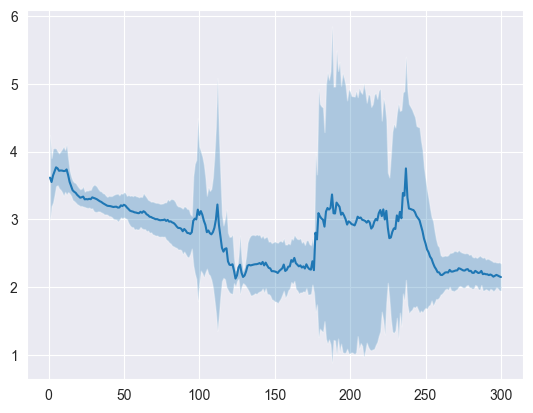

In [41]:
plot_means(learning_curves_selected)

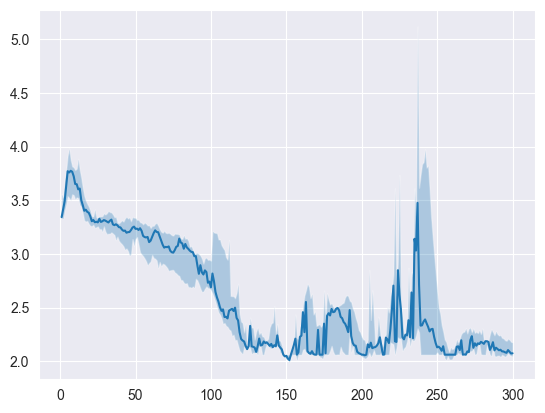

In [46]:
plot_medians(learning_curves_selected)

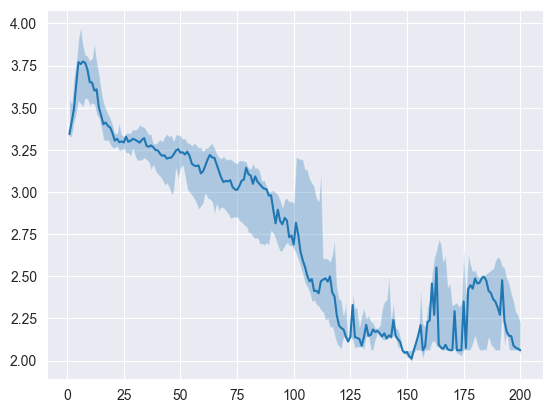

In [53]:
plot_medians(learning_curves_selected.iloc[:200])

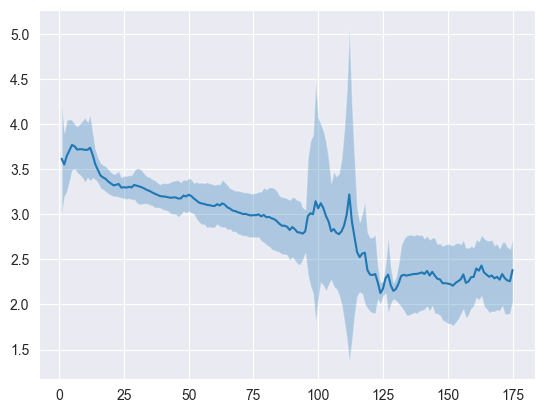

In [43]:
plot_means(learning_curves_selected.iloc[:175])

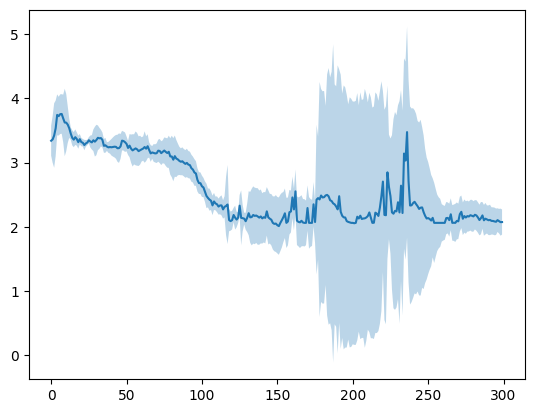

In [117]:
means = pd.concat(learning_curves, axis=1).median(axis=1)
stds = pd.concat(learning_curves, axis=1).std(axis=1)
import matplotlib.pyplot as plt
means.plot()
plt.fill_between(means.index, means - stds, means + stds, alpha=0.3)